# Image and Video Processing 
## Project: Image Stegnography

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

### Some basic useful functions 

In [147]:
def convertToGray(I):
    '''Converts an RGB image to grayscale image.'''
    if(len(I.shape)==2):
        return I
    I = 0.2126 * I[: , : , 0] + 0.7152 * I[: , : , 1] + 0.0722 * I[: , : , 2]
    I = np.round(I)
    I = I.astype(np.int64)
    return I

# Assuming I is I 256 gray levels.
def histogram(I):
    '''Computes the histogram of an I.'''
    hist = np.zeros(256)
    M, N = I.shape
    for i in range(M):
        for j in range(N): hist[I[i][j]] += 1
    
    return hist

def point_op(I, P = 1, L = 0, K = 255):
    '''Performs point operation on I.
    I: input image.
    P: scale factor.
    L: shift.
    K: maximum pixel value.'''
    P_new = P*I + L
    P_new = np.round(P_new)
    P_new = P_new.astype(np.int64)
    
    # clipping to 0 and 255
    P_new = np.maximum(P_new, 0) 
    P_new = np.minimum(P_new, K)
    
    return P_new

def FSCS(I):
    '''Performs Full Scale Contrast Stretching on I.
    I: input image.'''
    
    A = np.min(I)
    B = np.max(I)
    
    # as per results in class
    P = 255 / (B - A)
    L = -1 * A * 255 / (B - A)
    
    return point_op(I, P = P, L = L)

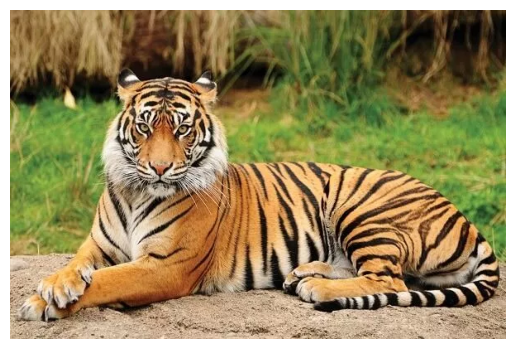

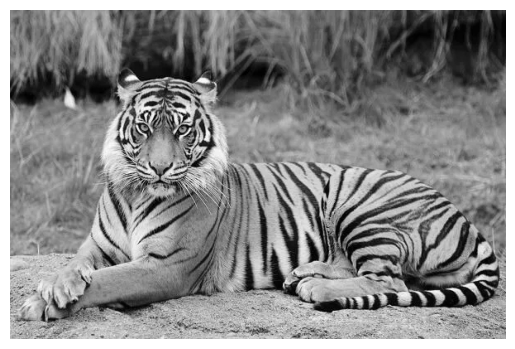

In [148]:
# import I
img = Image.open('Images/tiger.jpg')
img = np.asarray(img)

# convert to grayscale
gray_img = convertToGray(img)

# show I
plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

# # show histogram
# hist = histogram(gray_img)

# plt.bar(np.arange(256), hist, color='black')
# plt.title('Histogram')
# plt.xlabel('Intensity Levels')
# plt.ylabel('Frequency')
# plt.show()

### (R, G, B) -> (L, a, b)

In [149]:
def transform(image):
    
    image = image / 255

    image[image > 0.04045] = ((image[image > 0.04045] + 0.055) / 1.055) ** 2.4
    image[image <= 0.04045] = image[image <= 0.04045] / 12.92
    image = image * 100
                
    return image

def linearTransform(image):
    m , n , p = image.shape
    new_image = np.zeros((m,n,p))
    
    X = 0.4124564 * image[:,:,0] + 0.3575761 * image[:,:,1] + 0.1804375 * image[:,:,2]
    Y = 0.2126729 * image[:,:,0] + 0.7151522 * image[:,:,1] + 0.0721750 * image[:,:,2]
    Z = 0.0193339 * image[:,:,0] + 0.1191920 * image[:,:,1] + 0.9503041 * image[:,:,2]
    
    X = X / 95.047
    Y = Y / 100.000
    Z = Z / 108.883
    
    X = np.where(X > 0.008856, X ** (1/3), 7.787 * X + 16/116)
    Y = np.where(Y > 0.008856, Y ** (1/3), 7.787 * Y + 16/116)
    Z = np.where(Z > 0.008856, Z ** (1/3), 7.787 * Z + 16/116)
    
    L = (116 * Y) - 16
    a = 500 * (X - Y)
    b = 200 * (Y - Z)
    
    new_image[:,:,0] = L
    new_image[:,:,1] = a
    new_image[:,:,2] = b
    
    return new_image

from skimage import color
def convertToLAB(I):
    '''Converts an RGB image to LAB image.
    Input, I: RGB image.'''
    
    return color.rgb2lab(I)

In [150]:
def convertToRGB(I):
    '''Converts an LAB image to RGB image.
    Input, I: LAB image.'''
    # L, a, b = I[:,:,0], I[:,:,1], I[:,:,2]
    
    # y = (L + 16) / 116
    # x = a / 500 + y
    # z = y - b / 200

    # x = np.where(x > 0.206897, x ** 3, (x - 16 / 116) / 7.787)
    # y = np.where(y > 0.206897, y ** 3, (y - 16 / 116) / 7.787)
    # z = np.where(z > 0.206897, z ** 3, (z - 16 / 116) / 7.787)

    # x = x * 95.047
    # y = y * 100.000
    # z = z * 108.883

    # r = x *  3.2406 + y * -1.5372 + z * -0.4986
    # g = x * -0.9689 + y *  1.8758 + z *  0.0415
    # b = x *  0.0557 + y * -0.2040 + z *  1.0570
    
    # r = np.where(r > 0.0031308, 1.055 * (r ** (1 / 2.4)) - 0.055, r * 12.92)
    # g = np.where(g > 0.0031308, 1.055 * (g ** (1 / 2.4)) - 0.055, g * 12.92)
    # b = np.where(b > 0.0031308, 1.055 * (b ** (1 / 2.4)) - 0.055, b * 12.92)

    # rgb = np.dstack([r, g, b])
    # # rgb = np.round(rgb)
    # # rgb = rgb.astype(np.int64)
    
    # # # clipping to 0 and 255
    # # rgb = np.maximum(rgb, 0) 
    # # rgb = np.minimum(rgb, 255)
    
    # print(rgb.max(), rgb.min())
    return color.lab2rgb(I)


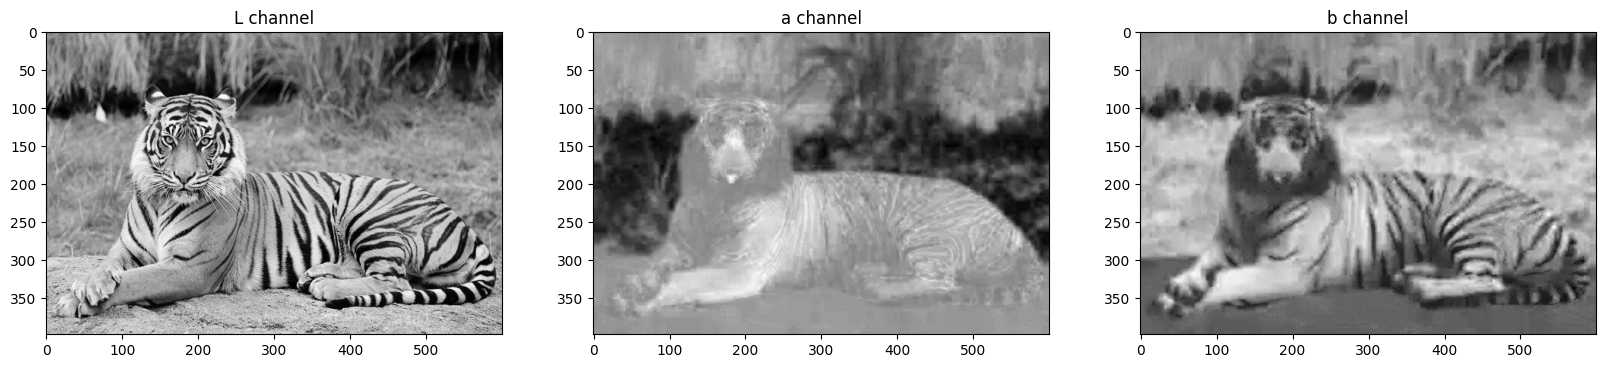

In [151]:
lgb_img = convertToLAB(img)

plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
plt.imshow(lgb_img[:,:,0], cmap='gray')
plt.title('L channel')

plt.subplot(1, 3, 2)
plt.imshow(lgb_img[:,:,1], cmap='gray')
plt.title('a channel')

plt.subplot(1, 3, 3)
plt.imshow(lgb_img[:,:,2], cmap='gray')
plt.title('b channel')

plt.show()

### DFT-IDFT Functions

In [152]:
def DFT(I, centered=False):
    '''Computes the 2D DFT of an image using matrix multiplication.
    Input: I, a 2D numpy array.
    Parameter centered: if True, the phase will be centered.
    Returns the magnitude and phase of the 2D DFT.'''
    M, N = I.shape
    
    I = I.copy()
        
    if(centered):
        for i in range(M):
            for j in range(N):
                I[i][j] *= (-1)**(i+j)
    
    # declaring matrices of complex exponential
    W_N = np.zeros([N,N], dtype=np.complex128)
    W_M = np.zeros([M,M], dtype=np.complex128)
    
    for u in range(N): 
        for i in range(N):
            W_N[u][i] = u*i
            
    for v in range(M): 
        for j in range(M):
            W_M[v][j] = v*j
    
    W_N = np.exp(-2*np.pi*1j/N) ** W_N
    W_M = np.exp(-2*np.pi*1j/M) ** W_M
    
    dft = np.matmul(np.matmul(W_M, I), W_N)
    
    return np.abs(dft), np.angle(dft)  

def IDFT(mag, phase, centered=False):
    '''Computes the 2D IDFT of an image.
    Input: mag, the magnitude of the 2D DFT.
           phase, the phase of the 2D DFT.
           centered: if True, origin will be conisdered at the center.
    Returns the 2D IDFT of the image using the IDFT matrix.'''
    I = mag * np.exp(1j * phase)
    M, N = I.shape
    
    # declaring matrices of complex exponential
    W_N = np.zeros([N,N], dtype=np.complex128)
    W_M = np.zeros([M,M], dtype=np.complex128)
    
    for u in range(N): 
        for i in range(N):
            W_N[u][i] = u*i
            
    for v in range(M): 
        for j in range(M):
            W_M[v][j] = v*j
    
    W_N = np.exp(2*np.pi*1j/N) ** W_N
    W_M = np.exp(2*np.pi*1j/M) ** W_M
    
    idft = np.matmul(np.matmul(W_M, I), W_N)
    idft = idft/(M*N)
    
    if(centered):
        for i in range(M):
            for j in range(N):
                idft[i][j] *= (-1)**(i+j)
    
    return idft

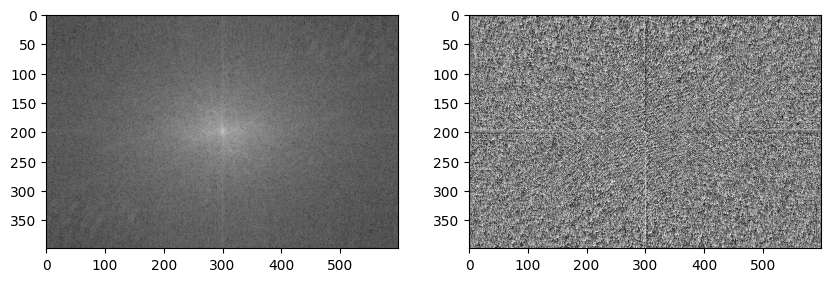

In [153]:
dft_mag, dft_phase = DFT(gray_img, centered=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + dft_mag), cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(dft_phase, cmap='gray')
plt.show()


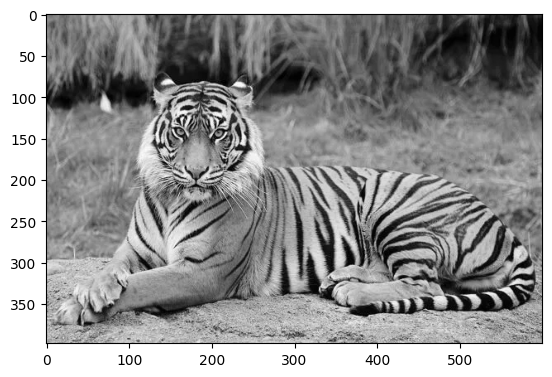

In [154]:
I = IDFT(dft_mag, dft_phase, centered=True)

plt.imshow(np.real(I), cmap='gray')
plt.show()

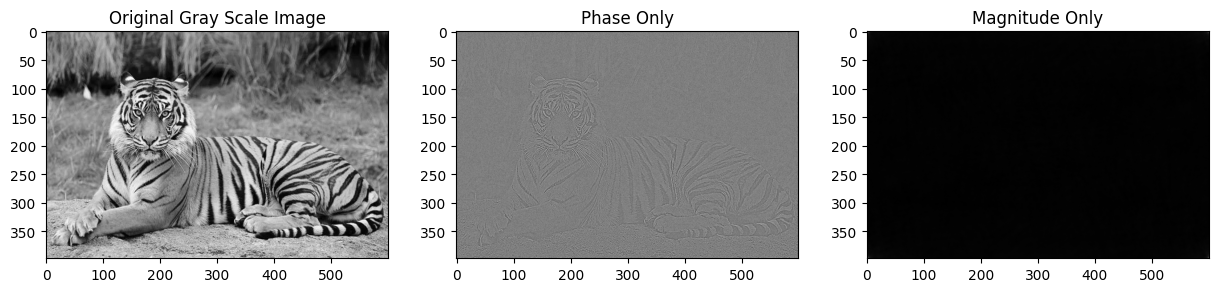

In [155]:
# Inverse fourier transform of the phase only and magnitude only image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Gray Scale Image')

I = np.real(IDFT(np.ones_like(dft_mag), dft_phase, centered=True))
plt.subplot(1, 3, 2)
plt.imshow(I, cmap='gray')
plt.title('Phase Only')

I = np.real(IDFT(dft_mag, np.zeros_like(dft_phase), centered=True))
plt.subplot(1, 3, 3)
plt.imshow(I, cmap='gray')
plt.title('Magnitude Only')

plt.show()

(675, 1200)


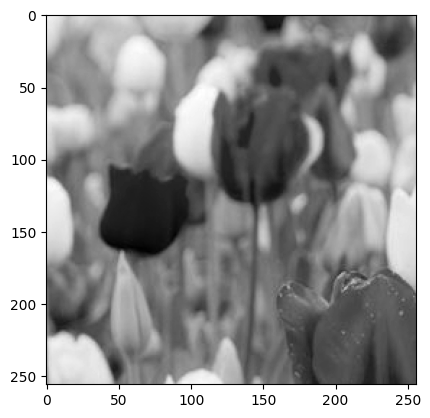

In [156]:
msg = Image.open('Images/flower.jpg')
msg = np.asarray(msg)
msg = convertToGray(msg)

print(msg.shape)
msg = msg[100:356, 100:356]

plt.imshow(msg, cmap='gray')
plt.show()

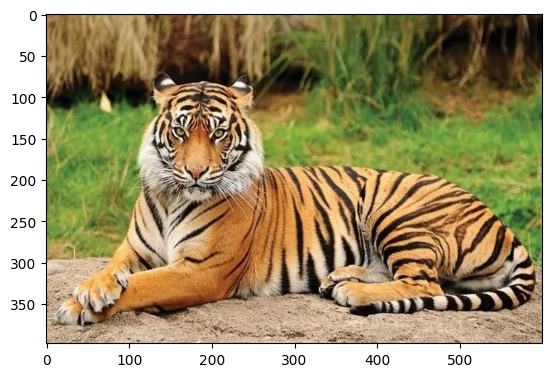

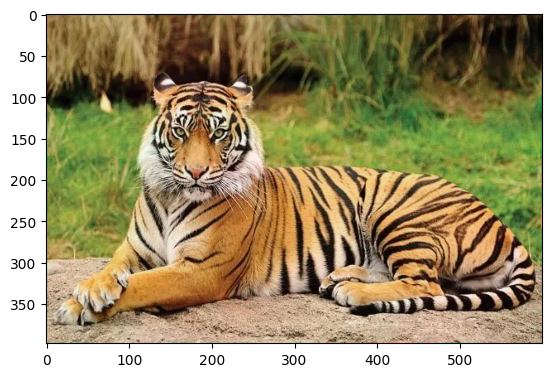

In [157]:
img = Image.open('Images/tiger.jpg')
img = np.asarray(img)

plt.imshow(img)
plt.show()

img = convertToLAB(img)

# Extracting the a, b channels
img_a = img[:,:,1]
img_b = img[:,:,2]

dft_mag_a, phase_a = DFT(img_a, centered=False)
dft_mag_b, phase_b = DFT(img_b, centered=False)

m, n = msg.shape

x = (dft_mag_a[-m:, -n:]).copy()
dft_mag_a[-m:, -n:] = msg*100
 
idft_a = IDFT(dft_mag_a, phase_a, centered=False)
idft_b = IDFT(dft_mag_b, phase_b, centered=False)

img[:,:,1] = np.real(idft_a)
img[:,:,2] = np.real(idft_b)

img = convertToRGB(img)

plt.imshow(img)
plt.show()

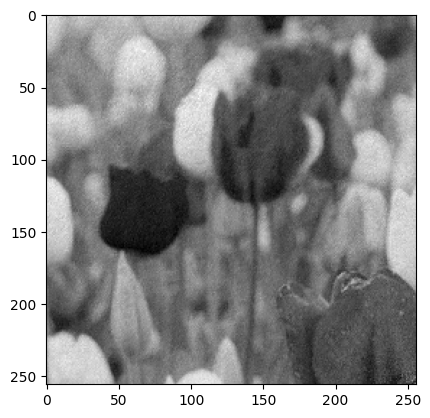

In [158]:
img = convertToLAB(img)
a = img[:,:,1] + 1j*np.imag(idft_a)
b = img[:,:,2]

dft_mag_a, phase_a = DFT(a, centered=False)
dft_mag_b, phase_b = DFT(b, centered=False)

msg1 = dft_mag_a[-m:, -n:] 

plt.imshow(msg1, cmap='gray')

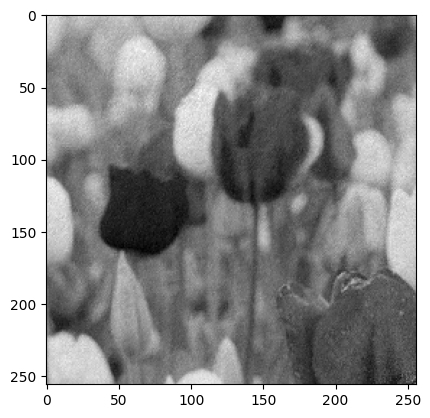

In [160]:
plt.imshow(point_op(FSCS(msg1), L=0), cmap="gray")